100%|████████████████████████████| 9912422/9912422 [00:03<00:00, 2992808.40it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|███████████████████████████████| 28881/28881 [00:00<00:00, 44716018.39it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|█████████████████████████████| 1648877/1648877 [00:03<00:00, 456300.79it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 6700854.30it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/5], Loss: 1.4665
Epoch [2/5], Loss: 1.5549
Epoch [3/5], Loss: 1.5728
Epoch [4/5], Loss: 1.4694
Epoch [5/5], Loss: 1.4657

Accuracy on the test set: 0.9522


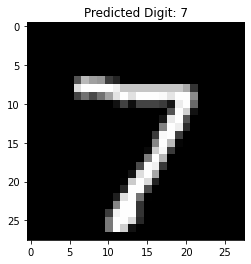

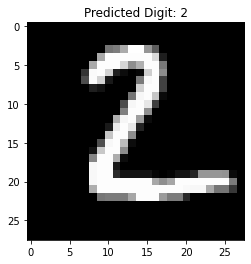

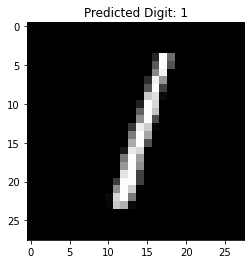

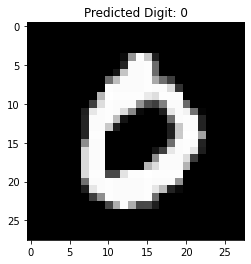

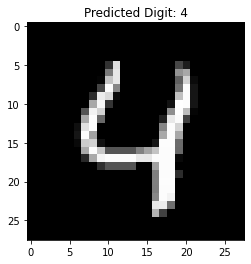

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

# Hyperparameters
batch_size = 64
learning_rate = 0.001
epochs = 5

# Download MNIST dataset and apply transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Instantiate the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(epochs):
    for batch_images, batch_labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(batch_images)  # Forward pass
        loss = criterion(outputs, batch_labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for batch_images, batch_labels in test_loader:
        outputs = model(batch_images)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

accuracy = correct / total
print(f'\nAccuracy on the test set: {accuracy:.4f}')

# Save the model
torch.save(model.state_dict(), 'handwritten_digits_model.pth')

# Load the model
loaded_model = SimpleNN()
loaded_model.load_state_dict(torch.load('handwritten_digits_model.pth'))

# Visualize predictions on a few test samples
loaded_model.eval()
with torch.no_grad():
    for i in range(5):
        sample = test_dataset[i][0].unsqueeze(0)
        output = loaded_model(sample)
        _, predicted_digit = torch.max(output.data, 1)

        plt.imshow(sample.squeeze().numpy(), cmap='gray')
        plt.title(f'Predicted Digit: {predicted_digit.item()}')
        plt.show()
